In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
#from sktime.performance_metrics.forecasting import median_relative_absolute_error
from sklearn.model_selection import KFold
from itertools import product
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
#from sktime.performance_metrics.forecasting import mean_absolute_scaled_error

In [ ]:
#忽略警告訊息
warnings.filterwarnings('ignore')

In [ ]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [ ]:
data = pd.read_csv("D:/python/深度學習課程/NVDA15-23.csv")
data

,Date,Y,Lag_1,Lag_2,Lag_3
0,2015/1/2,5.032500,5.012500,5.092500,5.140000
1,2015/1/5,4.947500,5.032500,5.012500,5.092500
2,2015/1/6,4.797500,4.947500,5.032500,5.012500
3,2015/1/7,4.785000,4.797500,4.947500,5.032500
4,2015/1/8,4.965000,4.785000,4.797500,4.947500
...,...,...,...,...,...
2109,2023/5/19,312.640015,316.779999,301.779999,292.130005
2110,2023/5/22,311.760010,312.640015,316.779999,301.779999
2111,2023/5/23,306.880005,311.760010,312.640015,316.779999
2112,2023/5/24,305.380005,306.880005,311.760010,312.640015


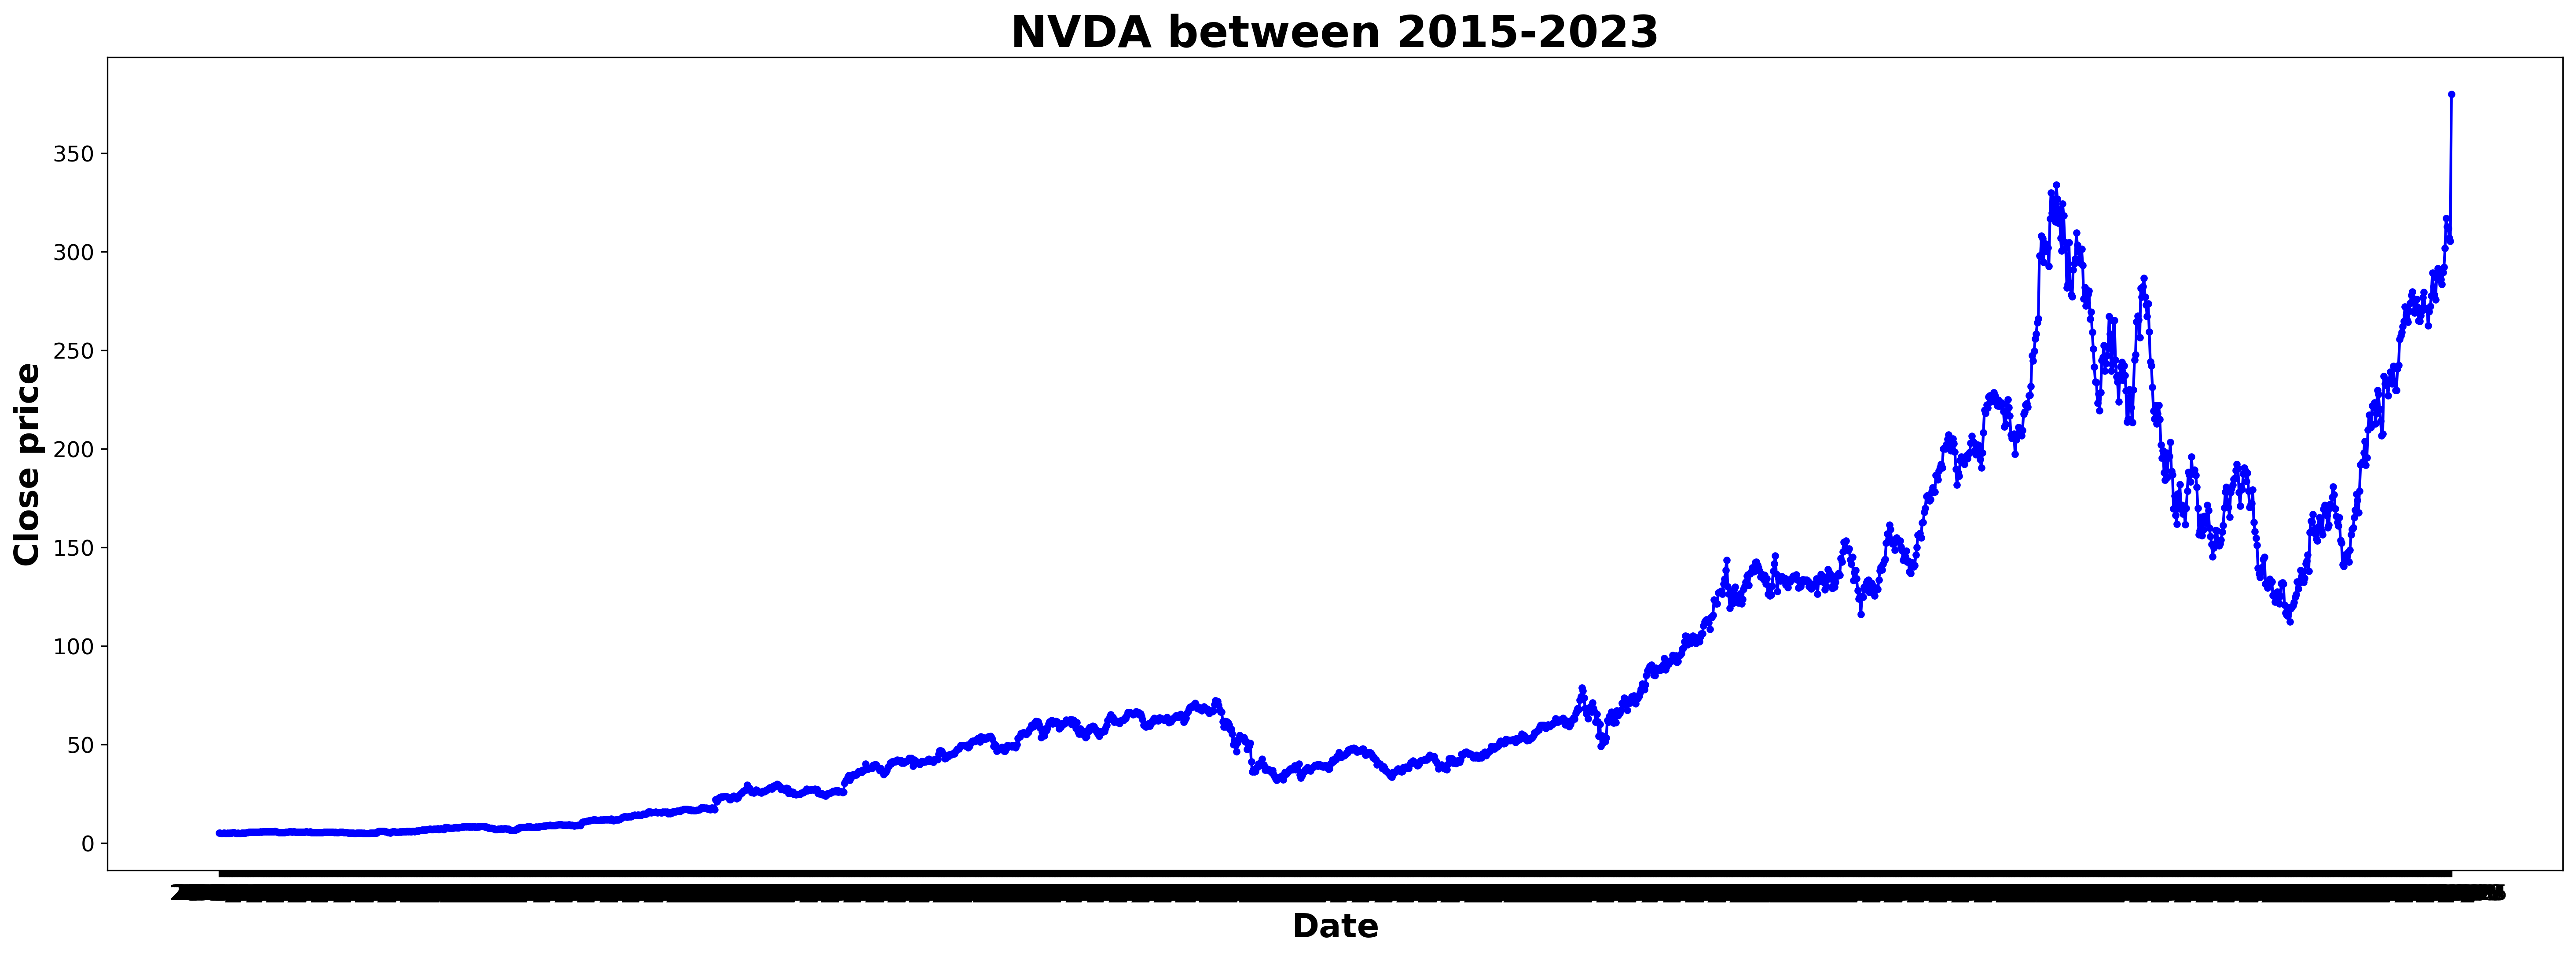

In [ ]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('NVDA between 2015-2023',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Close price',fontsize=18,weight='bold')

# Actual by predicted plot
plt.plot(data['Date'],data['Y'],marker='.',color='blue')

# Set the axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
x=data.drop(['Date' , 'Y'],axis=1).copy()
x.head()

,Lag_1,Lag_2,Lag_3
0,5.0125,5.0925,5.1400
1,5.0325,5.0125,5.0925
2,4.9475,5.0325,5.0125
3,4.7975,4.9475,5.0325
4,4.7850,4.7975,4.9475


In [ ]:
y=data['Y'].copy()
y.head()

0    5.0325
1    4.9475
2    4.7975
3    4.7850
4    4.9650
Name: Y, dtype: float64

# Rolling window

In [ ]:
#Rolling window 切資料
x_train1 = x[0:422]
x_validation1 = x[422:844]
y_train1 = y[0:422]
y_validation1 = y[422:844]

x_train2 = x[422:844]
x_validation2 = x[844:1266]
y_train2 = y[422:844]
y_validation2 = y[844:1266]

x_train3 = x[844:1266]
x_validation3 = x[1266:1688]
y_train3 = y[844:1266]
y_validation3 = y[1266:1688]

# 第一組正規化

In [ ]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train1)
new_x_train1=pd.DataFrame(data=normalize_df)
new_x_train1.columns=x.columns
print(new_x_train1.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation1)
new_x_validation1=pd.DataFrame(data=normalize_df)
new_x_validation1.columns=x.columns
print(new_x_validation1.head())

      Lag_1     Lag_2     Lag_3
0  0.020677  0.028018  0.032346
1  0.022495  0.020729  0.028018
2  0.014769  0.022551  0.020729
3  0.001136  0.014806  0.022551
4  0.000000  0.001139  0.014806
      Lag_1     Lag_2     Lag_3
0  0.015762  0.019009  0.009531
1  0.018852  0.015762  0.019009
2  0.013982  0.018852  0.015762
3  0.016339  0.013982  0.018852
4  0.000000  0.016339  0.013982


# 第二組正規化

In [ ]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train2)
new_x_train2=pd.DataFrame(data=normalize_df)
new_x_train2.columns=x.columns
print(new_x_train2.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation2)
new_x_validation2=pd.DataFrame(data=normalize_df)
new_x_validation2.columns=x.columns
print(new_x_validation2.head())

      Lag_1     Lag_2     Lag_3
0  0.015762  0.019009  0.009531
1  0.018852  0.015762  0.019009
2  0.013982  0.018852  0.015762
3  0.016339  0.013982  0.018852
4  0.000000  0.016339  0.013982
      Lag_1     Lag_2     Lag_3
0  0.793074  0.759921  0.749322
1  0.819879  0.793074  0.759921
2  0.785371  0.819879  0.793074
3  0.790486  0.785371  0.819879
4  0.730096  0.790486  0.785371


# 第三組正規化

In [ ]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train3)
new_x_train3=pd.DataFrame(data=normalize_df)
new_x_train3.columns=x.columns
print(new_x_train3.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation3)
new_x_validation3=pd.DataFrame(data=normalize_df)
new_x_validation3.columns=x.columns
print(new_x_validation3.head())

      Lag_1     Lag_2     Lag_3
0  0.793074  0.759921  0.749322
1  0.819879  0.793074  0.759921
2  0.785371  0.819879  0.793074
3  0.790486  0.785371  0.819879
4  0.730096  0.790486  0.785371
      Lag_1     Lag_2     Lag_3
0  0.077483  0.066804  0.064992
1  0.070931  0.077483  0.066804
2  0.068547  0.070931  0.077483
3  0.073231  0.068547  0.070931
4  0.073719  0.073231  0.068547


In [ ]:
#第一組驗證
knnre = KNeighborsRegressor()
parameters = {'n_neighbors' : range(1,101),
              'metric' : ['city block', 'correlation' , 'cosine' , 'euclidean' , 'minkowski' , 'spearman']
             }
x_set = np.concatenate([new_x_train1, new_x_validation1])
y_set = np.concatenate([y_train1, y_validation1])
model = GridSearchCV(knnre, parameters, scoring='neg_root_mean_squared_error', cv=3, refit=True)
model_result = model.fit(x_set,y_set)
print(model_result.best_params_,' score ：',model_result.best_score_)

{'metric': 'euclidean', 'n_neighbors': 40}  score ： -23.367662376132476


In [ ]:
#第二駔驗證
knnre = KNeighborsRegressor()
parameters = {'n_neighbors' : range(1,101),
              'metric' : ['city block', 'correlation' , 'cosine' , 'euclidean' , 'minkowski' , 'spearman']
             }
x_set = np.concatenate([new_x_train2, new_x_validation2])
y_set = np.concatenate([y_train2, y_validation2])
model = GridSearchCV(knnre, parameters, scoring='neg_root_mean_squared_error', cv=3, refit=True)
model_result = model.fit(x_set,y_set)
print(model_result.best_params_,' score ：',model_result.best_score_)

{'metric': 'euclidean', 'n_neighbors': 3}  score ： -11.519531031188473


In [ ]:
#第三組驗證
knnre = KNeighborsRegressor()
parameters = {'n_neighbors' : range(1,101),
              'metric' : ['city block', 'correlation' , 'cosine' , 'euclidean' , 'minkowski' , 'spearman']
             }
x_set = np.concatenate([new_x_train3, new_x_validation3])
y_set = np.concatenate([y_train3, y_validation3])
model = GridSearchCV(knnre, parameters, scoring='neg_root_mean_squared_error', cv=3, refit=True)
model_result = model.fit(x_set,y_set)
print(model_result.best_params_,' score ：',model_result.best_score_)

{'metric': 'cosine', 'n_neighbors': 12}  score ： -64.812701492389


In [ ]:
x_train = x[:1688]
x_test = x[1688:]
y_train = y[:1688]
y_test = y[1688:]

In [ ]:
model = KNeighborsRegressor(metric = 'euclidean' , n_neighbors = 3)
model.fit(x_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [ ]:
result = model.predict(x_test)
result

array([224.12333167, 224.75333167, 223.536667  , 223.48333267,
       223.05666633, 223.05666633, 223.05666633, 225.736664  ,
       223.536667  , 223.48333267, 199.62999967, 200.70166533,
       201.89833067, 195.71833767, 203.118332  , 204.38166833,
       201.89833067, 201.89833067, 200.44583133, 200.44583133,
       201.89833067, 214.592499  , 223.05666633, 224.63999967,
       223.15333067, 224.75333167, 225.006668  , 224.62      ,
       224.806666  , 224.62      , 224.62      , 223.926666  ,
       223.926666  , 223.926666  , 223.926666  , 223.926666  ,
       223.926666  , 223.926666  , 223.926666  , 223.19000233,
       223.19000233, 223.19000233, 223.19000233, 223.19000233,
       223.19000233, 223.19000233, 223.926666  , 223.926666  ,
       223.19000233, 223.19000233, 223.926666  , 223.19000233,
       223.926666  , 223.19000233, 223.19000233, 223.19000233,
       223.19000233, 223.19000233, 223.926666  , 223.19000233,
       223.19000233, 223.19000233, 223.19000233, 223.19

In [ ]:
# 8.2 Calculating the mertics
MAE=mean_absolute_error(y_test,result)
MSE=mean_squared_error(y_test,result,squared=True)
RMSE=mean_squared_error(y_test,result,squared=False)
MAPE=mean_absolute_percentage_error(y_test,result)
SMAPE=SMAPE_calulate(y_test,result)
RAE=RAE_calculate(y_test,result)
MRAE=MRAE_calculate(y_test,result)
MdRAE=MdRAE_calculate(y_test,result)
RSE=RSE_calculate(y_test,result,Root=False)
RRSE=RSE_calculate(y_test,result,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 23.539
MSE: 1314.173
RMSE: 36.252
MAPE: 9.17 %
SMAPE: 9.963 %
RAE: 0.481
MRAE: 0.0011295151153161227
MdRAE: 0.438 bench: 213.2
RSE: 0.406
RRSE: 0.637


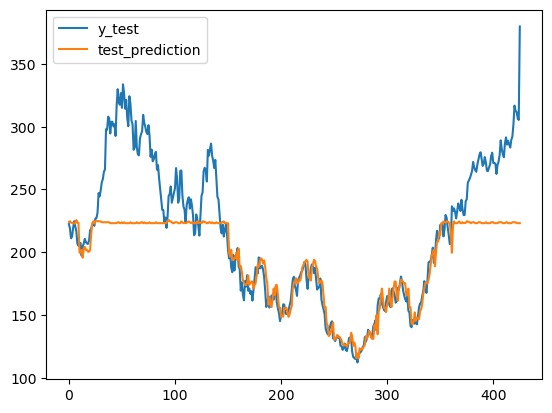

In [ ]:
y_test = y_test.reset_index(drop = True)
y_test.head()
fig = plt.figure()
plt.plot(y_test, label='y_test')
plt.plot(result, label='test_prediction')
plt.legend(loc='best')